# Client Project 5: EDA part

In [1]:
# importing Necessary Library
import pandas as pd
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import requests
import datetime
import json
import os
from bs4 import BeautifulSoup
from sklearn.linear_model import LogisticRegressionCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.naive_bayes import MultinomialNB, BernoulliNB, GaussianNB
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, BaggingClassifier
from sklearn.feature_extraction.text import HashingVectorizer, TfidfVectorizer, CountVectorizer
from sklearn.metrics import roc_auc_score
from sklearn.externals.six import StringIO 
from IPython.display import Image  
from sklearn.tree import export_graphviz
#import pydotplus



#  Configure Visual setting 
sns.set_style('whitegrid')
#plt.style.use(['bmh','presentation'])
plt.rcParams['figure.figsize'] = (10.0, 8.0) 
plt.style.use('ggplot')
np.random.seed(42)
sns.set()
%config InlineBackend.figure_format = 'retina'
%matplotlib inline    

/Users/derejeworkneh/anaconda3/lib/python3.6/site-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


#### 1 Load the Data

#### Load in the the data of scraped results

In [2]:
# Lets load the Concatenated DataFrame and the engine specification will help to delimit the outliers
#df1 = pd.read_csv('./data/ne bomb cyclone data w:o location/ne_bomb_cyclone_before_tweets.csv',index_col ='Unnamed: 0' , engine='python')
#df2 = pd.read_csv('./data/ne bomb cyclone data w:o location/ne_bomb_cyclone_during_tweets.csv',index_col ='Unnamed: 0' , engine='python')
#df3 = pd.read_csv('./data/ne bomb cyclone data w:o location/ne_bomb_cyclone_after_tweets.csv',index_col ='Unnamed: 0' , engine='python')


# To concatenate the three dataframes
#frames = [df1,df2,df3]

#df = pd.concat(frames)
#df = pd.read_csv('Project3edapartone.csv',index_col ='Unnamed: 0' , engine='python')

In [3]:
# Read CSVs:

bc_before = pd.read_csv('./data/ne bomb cyclone data w:o location/ne_bomb_cyclone_before_tweets.csv')
bc_during = pd.read_csv('./data/ne bomb cyclone data w:o location/ne_bomb_cyclone_during_tweets.csv')
bc_after  = pd.read_csv('./data/ne bomb cyclone data w:o location/ne_bomb_cyclone_after_tweets.csv')

jan_before = pd.read_csv('./data/january/january-early_after_tweets.csv')
jan_during = pd.read_csv('./data/january/january-mid_during_tweets.csv')
jan_after = pd.read_csv('./data/january/january-end_before_tweets.csv')

jul_before = pd.read_csv('./data/july/july-early_after_tweets.csv')
jul_during = pd.read_csv('./data/july/july-mid_during_tweets.csv')
jul_after = pd.read_csv('./data/july/july-end_before_tweets.csv')

In [4]:
# Concat CSVs:

dfs = [bc_before, bc_during, bc_after, jan_before, jan_during, jan_after, jul_before, jul_during, jul_after]

In [5]:
# Concatenate all data into one DataFrame:

df = pd.concat(dfs, ignore_index=True)

In [6]:
df.head()

,Unnamed: 0,Event,Stage,Query Date,Query Term,Id,Username,Text,Date,Hashtags,Location
0,0,ne_bomb_cyclone,before,2019-10-15,power outage,1183894397492043777,meekers999,Let's lose Govenor Gruesome in Cali please. He...,2019-10-14 23:56:34+00:00,NaN,NaN
1,1,ne_bomb_cyclone,before,2019-10-15,power outage,1183894362725289984,sharethiscrime,"Last time I checked, he's still a floofy baby ...",2019-10-14 23:56:26+00:00,NaN,NaN
2,2,ne_bomb_cyclone,before,2019-10-15,power outage,1183894014573105152,News_1jl4,California’s power outage means problems for e...,2019-10-14 23:55:03+00:00,NaN,NaN
3,3,ne_bomb_cyclone,before,2019-10-15,power outage,1183893791415123968,IndeCardio,Newsome is vanguard Globalism in action! What ...,2019-10-14 23:54:10+00:00,NaN,NaN
4,4,ne_bomb_cyclone,before,2019-10-15,power outage,1183893732652810240,BaddictsPH,Super Typhoon Faxai hit Chiba prefecture in Se...,2019-10-14 23:53:56+00:00,NaN,NaN


##### 2.1 Checking the DataFrame basic Format and columns

In [7]:
# print out the  size of the data and the number of rows and columns
print(df.head())
print(df.shape)
print(df.describe())

   Unnamed: 0            Event   Stage  Query Date    Query Term  \
0           0  ne_bomb_cyclone  before  2019-10-15  power outage   
1           1  ne_bomb_cyclone  before  2019-10-15  power outage   
2           2  ne_bomb_cyclone  before  2019-10-15  power outage   
3           3  ne_bomb_cyclone  before  2019-10-15  power outage   
4           4  ne_bomb_cyclone  before  2019-10-15  power outage   

                    Id        Username  \
0  1183894397492043777      meekers999   
1  1183894362725289984  sharethiscrime   
2  1183894014573105152       News_1jl4   
3  1183893791415123968      IndeCardio   
4  1183893732652810240      BaddictsPH   

                                                Text  \
0  Let's lose Govenor Gruesome in Cali please. He...   
1  Last time I checked, he's still a floofy baby ...   
2  California’s power outage means problems for e...   
3  Newsome is vanguard Globalism in action! What ...   
4  Super Typhoon Faxai hit Chiba prefecture in Se...   

 

##### 2.2. Determining Missing observations

In [8]:
df.isnull().sum()

Unnamed: 0        0
Event             0
Stage             0
Query Date        0
Query Term        0
Id                0
Username          0
Text              0
Date              0
Hashtags      14338
Location      18000
dtype: int64

In [9]:
df1 = df.dropna(axis=1)

In [10]:
# Given the very small amount of missing data, drop the missing values.
# df.dropna(inplace = True)

In [11]:
df1.head(5)

,Unnamed: 0,Event,Stage,Query Date,Query Term,Id,Username,Text,Date
0,0,ne_bomb_cyclone,before,2019-10-15,power outage,1183894397492043777,meekers999,Let's lose Govenor Gruesome in Cali please. He...,2019-10-14 23:56:34+00:00
1,1,ne_bomb_cyclone,before,2019-10-15,power outage,1183894362725289984,sharethiscrime,"Last time I checked, he's still a floofy baby ...",2019-10-14 23:56:26+00:00
2,2,ne_bomb_cyclone,before,2019-10-15,power outage,1183894014573105152,News_1jl4,California’s power outage means problems for e...,2019-10-14 23:55:03+00:00
3,3,ne_bomb_cyclone,before,2019-10-15,power outage,1183893791415123968,IndeCardio,Newsome is vanguard Globalism in action! What ...,2019-10-14 23:54:10+00:00
4,4,ne_bomb_cyclone,before,2019-10-15,power outage,1183893732652810240,BaddictsPH,Super Typhoon Faxai hit Chiba prefecture in Se...,2019-10-14 23:53:56+00:00


In [12]:
df1.tail(5)

,Unnamed: 0,Event,Stage,Query Date,Query Term,Id,Username,Text,Date
17995,1995,july-end,before,2019-06-30,power outage,1144415045637402624,RisingDarkstar,My boys are so trained.... There has been a wi...,2019-06-28 01:19:43+00:00
17996,1996,july-end,before,2019-06-30,power outage,1144414002644230144,qt_alexandria,The way these power outages set up it makes me...,2019-06-28 01:15:35+00:00
17997,1997,july-end,before,2019-06-30,power outage,1144413949745455104,SayNoToArsenal,There's a power outage? Welp.,2019-06-28 01:15:22+00:00
17998,1998,july-end,before,2019-06-30,power outage,1144413604881375232,CarGenerator1,Buy a CarGenerator for just a fraction of what...,2019-06-28 01:14:00+00:00
17999,1999,july-end,before,2019-06-30,power outage,1144413206481461248,XcelEnergyCO,Please direct message us your full service add...,2019-06-28 01:12:25+00:00


In [13]:
df1.isnull().sum()

Unnamed: 0    0
Event         0
Stage         0
Query Date    0
Query Term    0
Id            0
Username      0
Text          0
Date          0
dtype: int64

In [14]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18000 entries, 0 to 17999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  18000 non-null  int64 
 1   Event       18000 non-null  object
 2   Stage       18000 non-null  object
 3   Query Date  18000 non-null  object
 4   Query Term  18000 non-null  object
 5   Id          18000 non-null  int64 
 6   Username    18000 non-null  object
 7   Text        18000 non-null  object
 8   Date        18000 non-null  object
dtypes: int64(2), object(7)
memory usage: 1.2+ MB


In [15]:
df1.shape

(18000, 9)

In [16]:
corr = df1.corr()


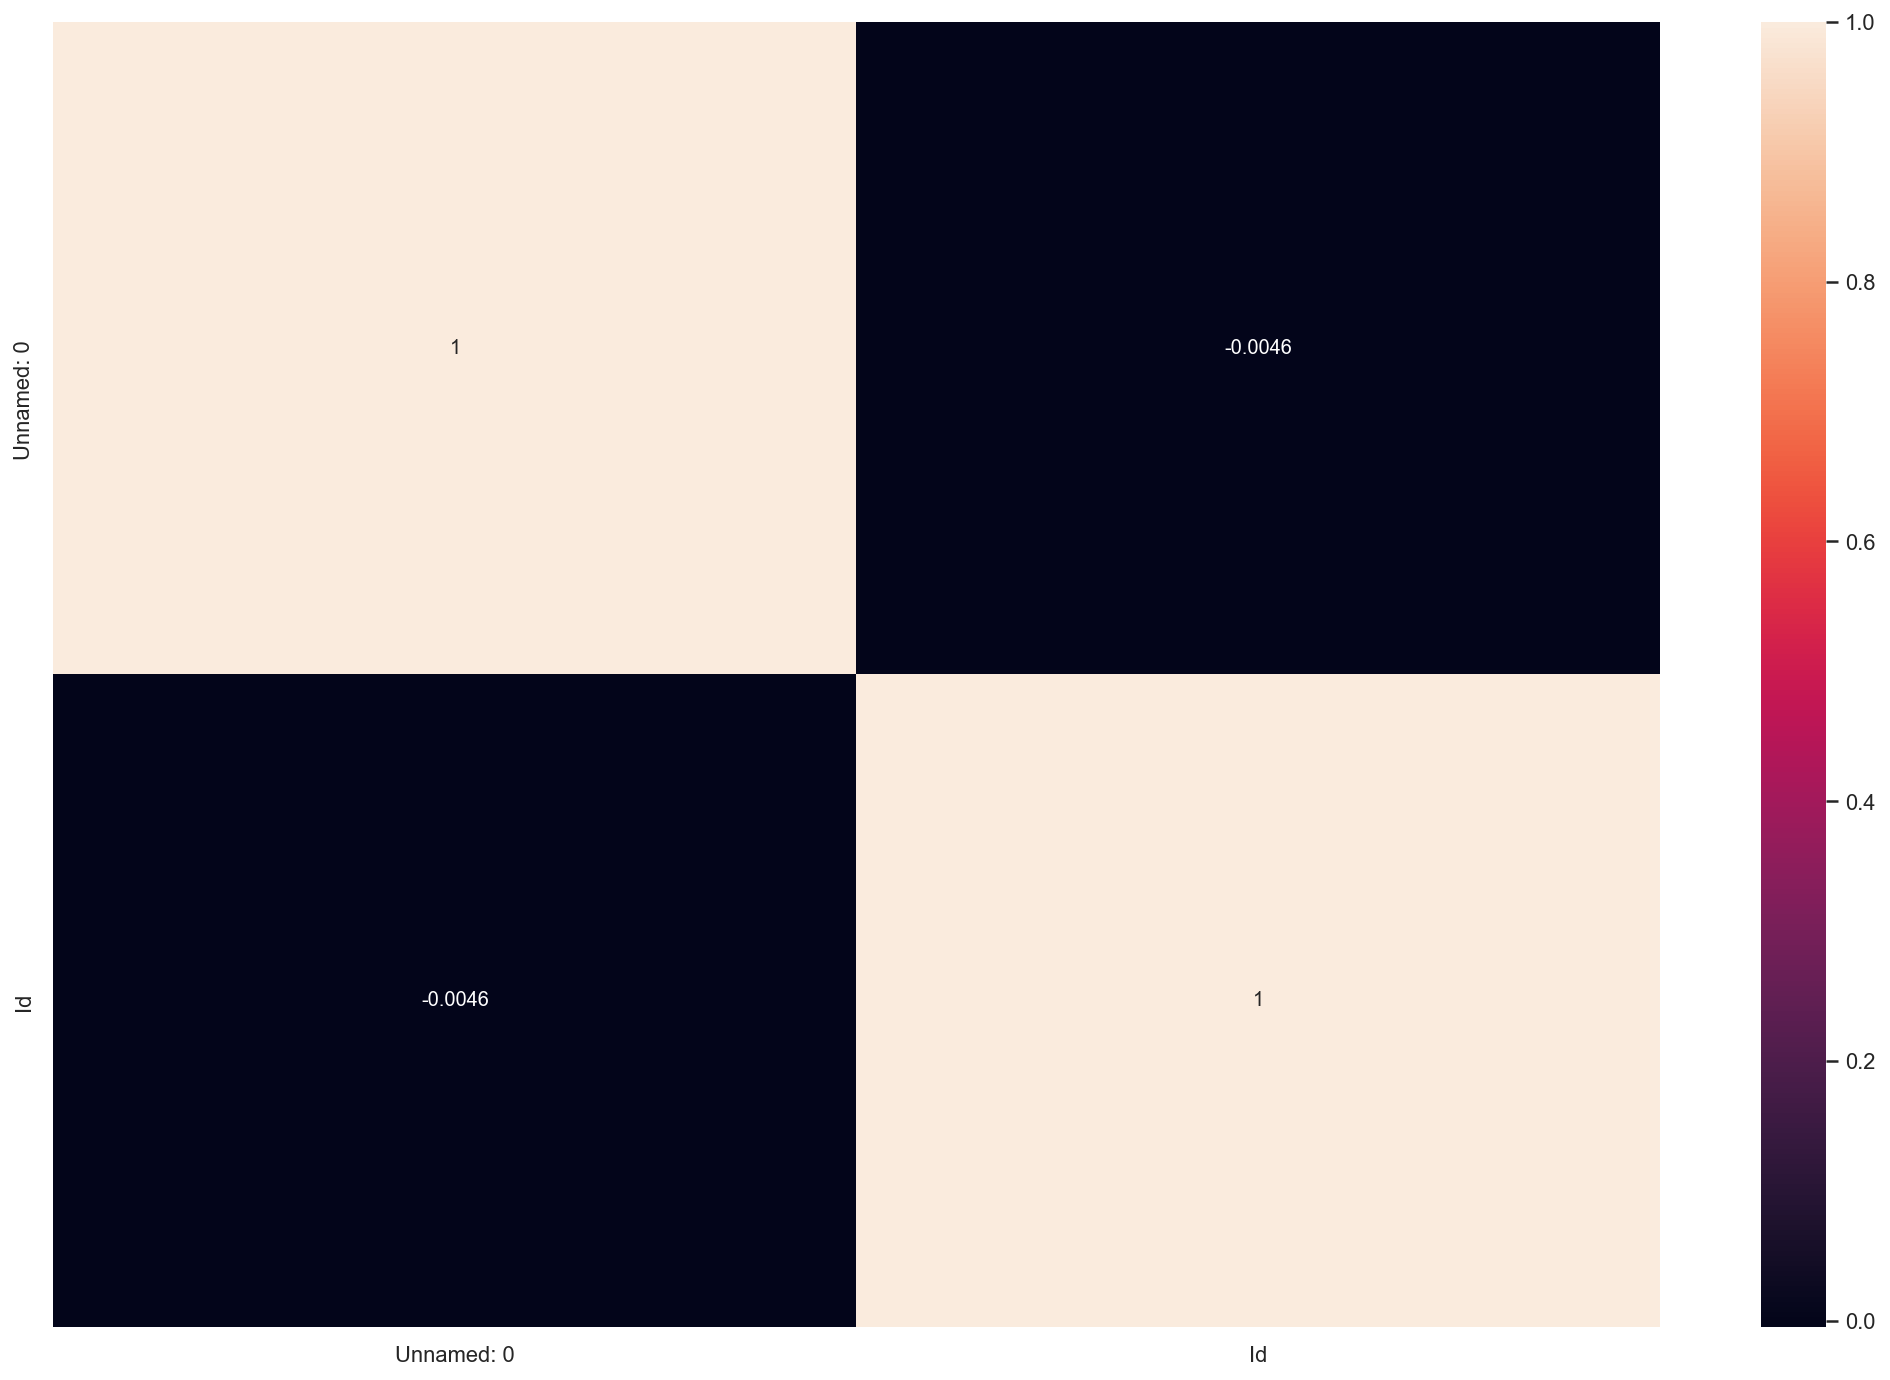

In [17]:
plt.figure(figsize=(18,12))

sns.heatmap(corr,
            annot=True);

In [18]:
# Checking missing values `.isnull() will convert to the boolean True and False and return new DataFrame where null values
# are indicated by True and the .sum() will give us the total numbel of null values per column.
# checking the null values in the DF , according to Ben this is the fancy one
(df1.isnull().sum() / df1.shape[0]).sort_values(ascending=False)   # credit Ben shaver

Date          0.0
Text          0.0
Username      0.0
Id            0.0
Query Term    0.0
Query Date    0.0
Stage         0.0
Event         0.0
Unnamed: 0    0.0
dtype: float64

#####  2.3. Describing the summary statistics of the columns

In [19]:
df1.head()

,Unnamed: 0,Event,Stage,Query Date,Query Term,Id,Username,Text,Date
0,0,ne_bomb_cyclone,before,2019-10-15,power outage,1183894397492043777,meekers999,Let's lose Govenor Gruesome in Cali please. He...,2019-10-14 23:56:34+00:00
1,1,ne_bomb_cyclone,before,2019-10-15,power outage,1183894362725289984,sharethiscrime,"Last time I checked, he's still a floofy baby ...",2019-10-14 23:56:26+00:00
2,2,ne_bomb_cyclone,before,2019-10-15,power outage,1183894014573105152,News_1jl4,California’s power outage means problems for e...,2019-10-14 23:55:03+00:00
3,3,ne_bomb_cyclone,before,2019-10-15,power outage,1183893791415123968,IndeCardio,Newsome is vanguard Globalism in action! What ...,2019-10-14 23:54:10+00:00
4,4,ne_bomb_cyclone,before,2019-10-15,power outage,1183893732652810240,BaddictsPH,Super Typhoon Faxai hit Chiba prefecture in Se...,2019-10-14 23:53:56+00:00


In [20]:
# the describe function gives summary statistics for each variable
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,18000.0,9.995000e+02,5.773662e+02,0.000000e+00,4.997500e+02,9.995000e+02,1.499250e+03,1.999000e+03
Id,18000.0,1.137373e+18,4.019824e+16,1.082440e+18,1.089777e+18,1.141209e+18,1.183792e+18,1.185705e+18


In [21]:
# sns.distplot(df, kde = True)

##### 2.4.  Feature Engineering/ Exploring the Target Variable

In [22]:
#checking the number of unique titles in the data set
len(df1['Text'].unique())

16646

In [23]:
x = list(df1['Text'].head(3))   # calling the five titles as list from the DF
x

['Let\'s lose Govenor Gruesome in Cali please. He just ordered the shut down of all mountain top ham radio repeaters. That means "no emergency communications" will be available during say.. a power outage ands mass fires. He\'s trying to kill you.',
 "Last time I checked, he's still a floofy baby complaining about power outage ",
 'California’s power outage means problems for electric cars.. Washingtonpost - Twitter - News - Noticias - Bitcoin - CryptoCurrency - @InvestCrypForex - @1jl4com - @Health14Fitness - @Marketing_1jl4 - @News_1jl4 &gt;']

In [24]:
# there are some duplicate comments, mostly automated comments by moderators

df1.duplicated().sum()

0

In [25]:
df1.head()

,Unnamed: 0,Event,Stage,Query Date,Query Term,Id,Username,Text,Date
0,0,ne_bomb_cyclone,before,2019-10-15,power outage,1183894397492043777,meekers999,Let's lose Govenor Gruesome in Cali please. He...,2019-10-14 23:56:34+00:00
1,1,ne_bomb_cyclone,before,2019-10-15,power outage,1183894362725289984,sharethiscrime,"Last time I checked, he's still a floofy baby ...",2019-10-14 23:56:26+00:00
2,2,ne_bomb_cyclone,before,2019-10-15,power outage,1183894014573105152,News_1jl4,California’s power outage means problems for e...,2019-10-14 23:55:03+00:00
3,3,ne_bomb_cyclone,before,2019-10-15,power outage,1183893791415123968,IndeCardio,Newsome is vanguard Globalism in action! What ...,2019-10-14 23:54:10+00:00
4,4,ne_bomb_cyclone,before,2019-10-15,power outage,1183893732652810240,BaddictsPH,Super Typhoon Faxai hit Chiba prefecture in Se...,2019-10-14 23:53:56+00:00


In [26]:
df1.dtypes

Unnamed: 0     int64
Event         object
Stage         object
Query Date    object
Query Term    object
Id             int64
Username      object
Text          object
Date          object
dtype: object

In [40]:
df1.Date = pd.to_datetime(df1.Date)

In [41]:
df1.dtypes

Unnamed: 0                  int64
Event                      object
Stage                      object
Query Date                 object
Query Term                 object
Id                          int64
Username                   object
Text                       object
Date          datetime64[ns, UTC]
dtype: object

In [46]:
df1.head()

,Unnamed: 0,Event,Stage,Query Date,Query Term,Id,Username,Text,Date
0,0,ne_bomb_cyclone,before,2019-10-15,power outage,1183894397492043777,meekers999,Let's lose Govenor Gruesome in Cali please. He...,2019-10-14 23:56:34+00:00
1,1,ne_bomb_cyclone,before,2019-10-15,power outage,1183894362725289984,sharethiscrime,"Last time I checked, he's still a floofy baby ...",2019-10-14 23:56:26+00:00
2,2,ne_bomb_cyclone,before,2019-10-15,power outage,1183894014573105152,News_1jl4,California’s power outage means problems for e...,2019-10-14 23:55:03+00:00
3,3,ne_bomb_cyclone,before,2019-10-15,power outage,1183893791415123968,IndeCardio,Newsome is vanguard Globalism in action! What ...,2019-10-14 23:54:10+00:00
4,4,ne_bomb_cyclone,before,2019-10-15,power outage,1183893732652810240,BaddictsPH,Super Typhoon Faxai hit Chiba prefecture in Se...,2019-10-14 23:53:56+00:00


In [54]:
hours = df1['Date'].dt.hour

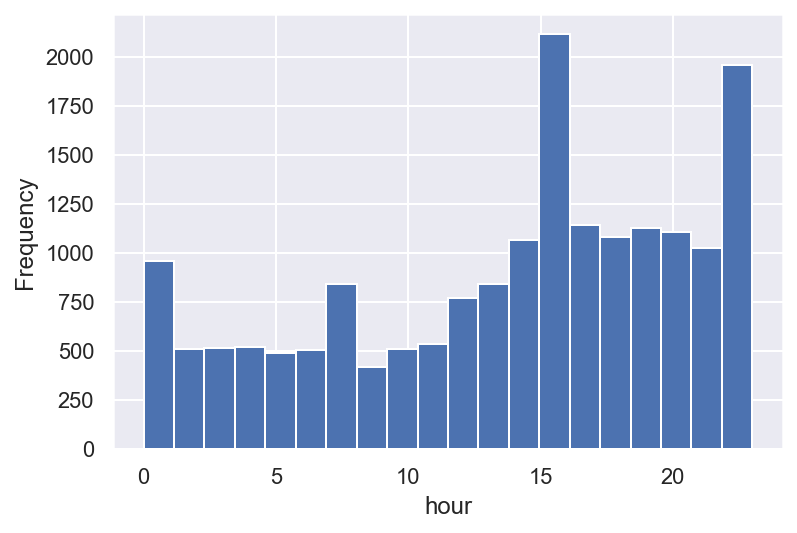

In [66]:
hours.plot(kind = 'hist', bins=20);
plt.ylabel('Frequency')
plt.xlabel('hour');

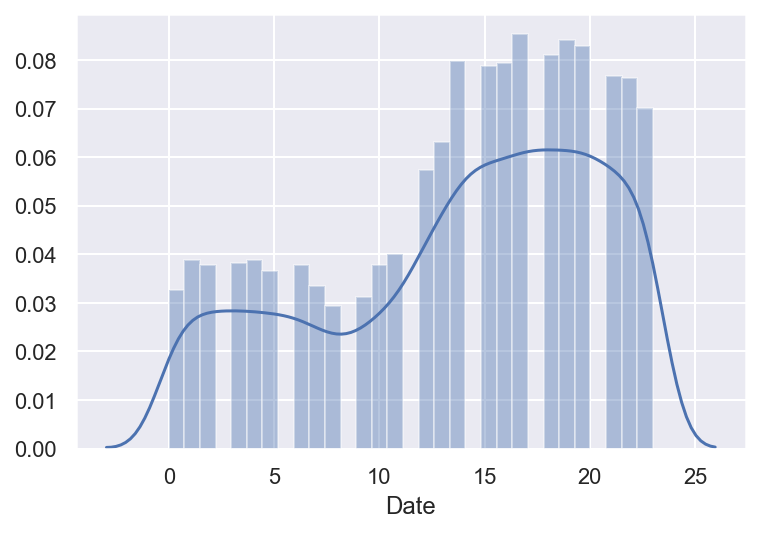

In [62]:
ax = sns.distplot(hours)

In [59]:
#hours.plot(kind = 'bar')

In [45]:
# df1.[Query Term] = pd.to_datetime(df1.[Query Term])

In [30]:
v1 = lambda x:float(x[0:-1])

In [49]:
#df1.Date = df1.Date.apply(v1)

In [27]:
pd.to_datetime(df1['Date'])

0       2019-10-14 23:56:34+00:00
1       2019-10-14 23:56:26+00:00
2       2019-10-14 23:55:03+00:00
3       2019-10-14 23:54:10+00:00
4       2019-10-14 23:53:56+00:00
                   ...           
17995   2019-06-28 01:19:43+00:00
17996   2019-06-28 01:15:35+00:00
17997   2019-06-28 01:15:22+00:00
17998   2019-06-28 01:14:00+00:00
17999   2019-06-28 01:12:25+00:00
Name: Date, Length: 18000, dtype: datetime64[ns, UTC]

In [28]:
df1.dtypes

Unnamed: 0     int64
Event         object
Stage         object
Query Date    object
Query Term    object
Id             int64
Username      object
Text          object
Date          object
dtype: object

In [27]:
#pd.to_datetime(df1[''])